In [1]:
import mnist_util as mu
import numpy as np

train, train_labels, test, test_labels = mu.get_np_array()

showing picture number: 52624


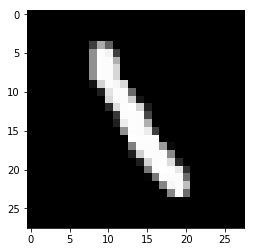

In [10]:
from random import randint
%matplotlib inline

rnd = randint(0,len(train)-1)
print("showing picture number: {rnd}".format(rnd=rnd))
mu.show_a_num(train[rnd])

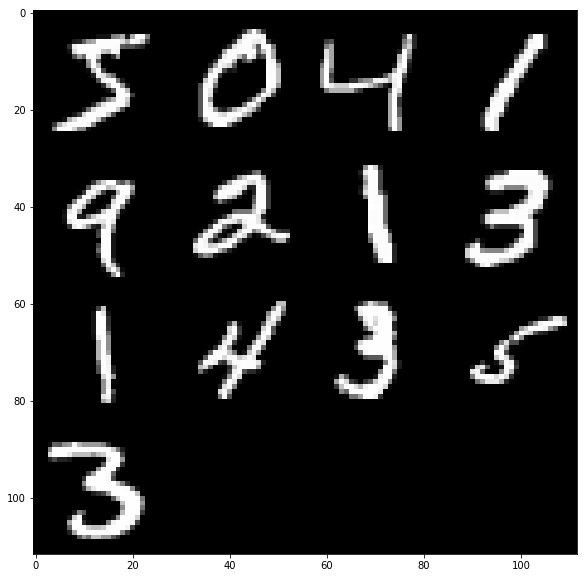

In [4]:
testing = train[:13]
mu.show_nums(testing, square=True, xsize=10, ysize=10)

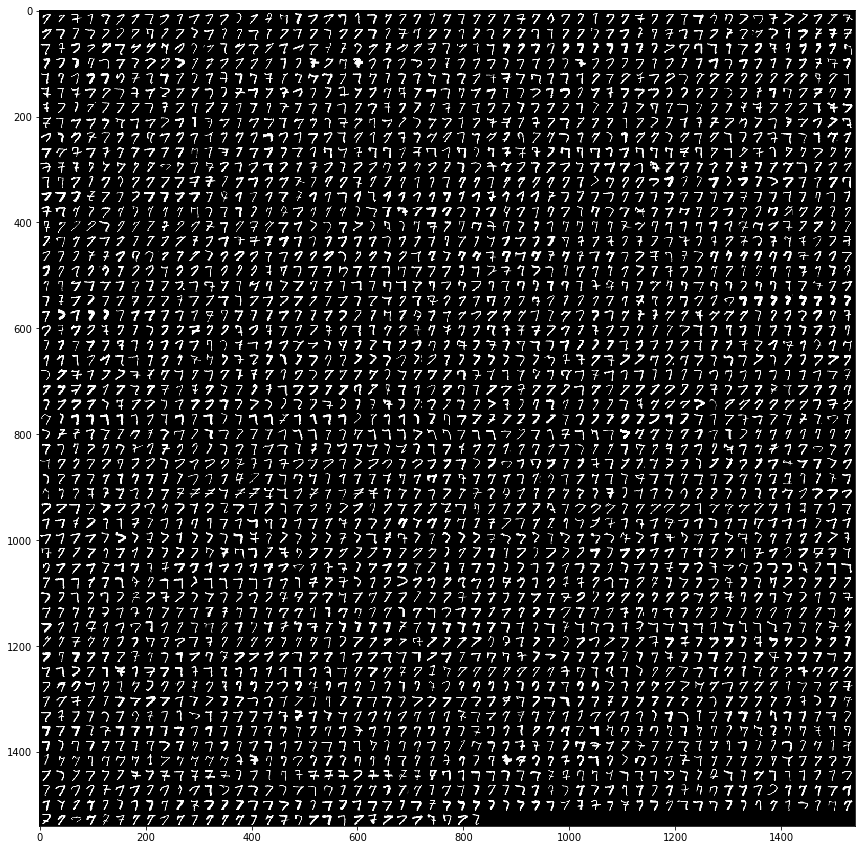

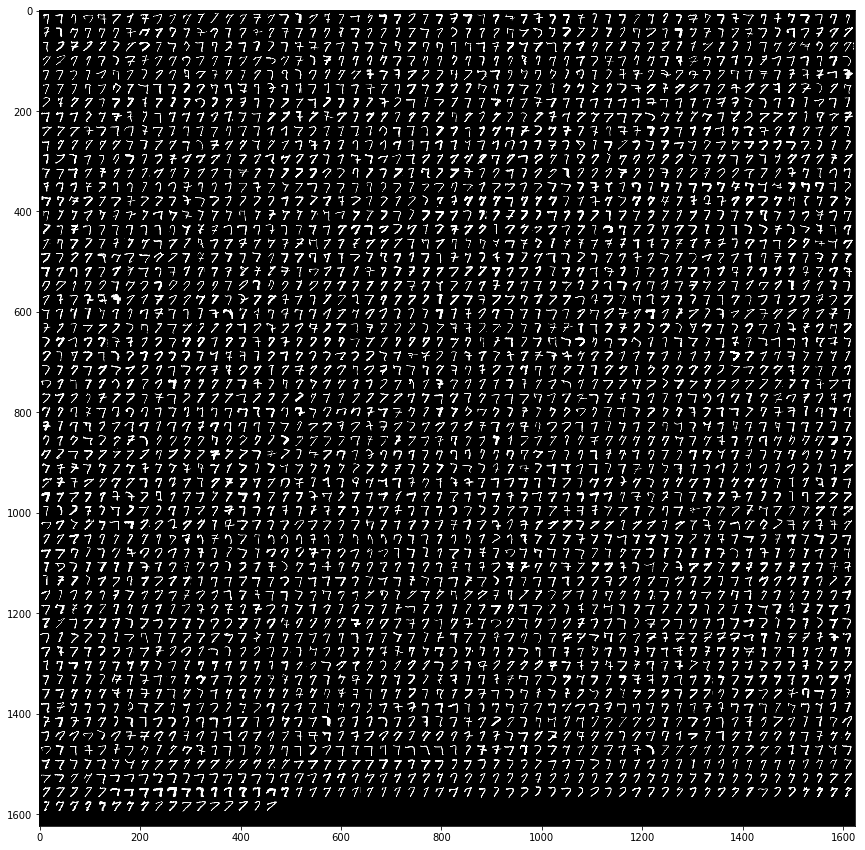

In [9]:
num_arrays = mu.get_all_nums(train,train_labels)
num = num_arrays[7]
mu.show_nums(num[:3000], square=True)
mu.show_nums(num[3000:], square=True)